In [0]:
# Reference: https://colab.research.google.com/drive/1nVVRhr1uueuWiEFFZQ9XC6fZjsF6JntT
# Reference: https://www.tensorflow.org/tutorials/keras/classification

# Step 1: Installation and Setup

In [1]:
# Installing TensorFlow
pip install tensorflow-gpu

     |████████████████████████████████| 380.8MB 47kB/s 
     |████████████████████████████████| 450kB 50.7MB/s 
     |████████████████████████████████| 3.8MB 54.7MB/s 
     |████████████████████████████████| 81kB 11.2MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled goo

In [0]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.0.0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [0]:
# Importing the dataset
from tensorflow.keras.datasets import fashion_mnist

In [5]:
# Loading the dataset
# load_data() 함수를 호출하면 네 개의 넘파이(NumPy) 배열이 반환
# x_train, y_train(train data label) : 훈련 데이터 세트 
# x_test, y_test(test data label) : 테스트 데이터 세트 
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
# 이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이임  
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
# 레이블(label)은 0에서 9까지의 정수 배열입니다. 이 값은 이미지에 있는 옷의 클래스(class)를 나타냄
y_train.shape, y_test.shape # y_train label / y_test label 

((60000,), (10000,))

In [8]:
np.max(x_train), np.min(x_train), np.mean(x_train)

(255, 0, 72.94035223214286)

In [9]:
np.max(y_train), np.min(y_train)

(9, 0)

In [10]:
# 각 이미지는 하나의 레이블에 매핑되어 있습니다. 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장
class_names = ['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


In [11]:
# 전체 데이터셋 구조 확인 
# 훈련 세트에 60,000개의 이미지가 있다는 것을 보여주고 각 이미지는 28x28 픽셀로 표현됨 
x_train.shape

(60000, 28, 28)

In [13]:
# 훈련 세트에는 60,000개의 레이블이 있음 
len(y_train)

60000

In [14]:
# 각 레이블은 0과 9사이의 정수
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
# 테스트 세트에는 10,000개의 이미지가 있으며, 이 이미지도 28x28 픽셀로 표현
x_test.shape

(10000, 28, 28)

In [16]:
# 테스트 세트는 10,000개의 이미지에 대한 레이블을 가지고 있음 
len(y_test)

10000

In [18]:
# 각 레이블은 0과 9사이의 정수  
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

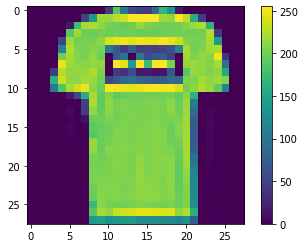

In [20]:
# Data Exploration
# 네트워크를 훈련하기 전에 데이터를 전처리해야 하며, 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있음 
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [13]:
y_train[1]

0

In [0]:
# Normalizing the dataset
# 값의 범위를 0부터 1사이로 설정하기 위해 255로 나눔 (정규화)
x_train = x_train / 255.0
x_test = x_test / 255.0

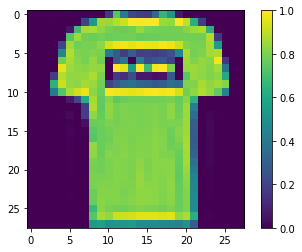

In [22]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

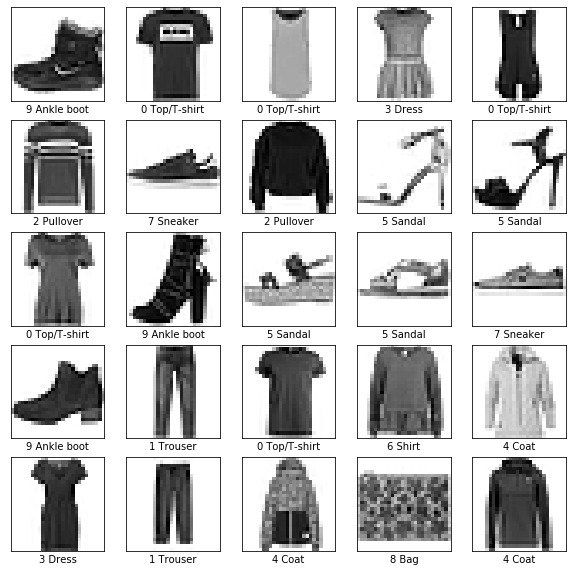

In [23]:
# 훈련 세트에서 처음 25개 이미지와 그 아래 클래스 이름을 출력 후 데이터 포맷이 올바른지 확인하고 네트워크 구성과 훈련할 준비를 마침
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [24]:
# Flattening the dataset
# 훈련 데이터셋과 테스트 데이터셋을 Flatten해서 784개의 픽셀을 가진 1차원 벡터로 변환한다.
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [0]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [26]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

# Step 3: Building the Model

In [0]:
# 모델을 생성함 
# Define an object
model = tf.keras.models.Sequential()
# sequence of layers

In [0]:
# Adding first fully connected hidden layer
# Input Layer와 첫 번째 Fully Connected Hidden Layer를 연결 
# 1) units (No of neurons) = 128 (128개 뉴런을 가짐)
# 2) activation function = ReLU
# 3) input shape = 784
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))

In [0]:
# Overfitting 방지를 위해 Dropout 을 적용한 두 번째 Hidden Layer 연결 
# Adding the second layer with dropout
model.add(tf.keras.layers.Dropout(0.3))
# regularization technique, prevents overfitting

In [0]:
# 마지막으로 Output Layer 연결 
# Adding the output layer
# 1) units = 10 (10개의 뉴런을 가짐)
# 2) activation = softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [0]:
# Flatten 미리 하지 않고 모델 안에서 다 하고 Dropout 하지 않는 방법도 있음  
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28, 28)),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])

# Step 4: Training the model

# 모델 컴파일 
모델을 훈련하기 전에 필요한 몇 가지 설정이 모델 컴파일 단계에서 추가됩니다:

### 손실 함수(Loss function)-훈련 하는 동안 모델의 오차를 측정합니다. 모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화해야 합니다.
### 옵티마이저(Optimizer)-데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정합니다.
### 지표(Metrics)-훈련 단계와 테스트 단계를 모니터링하기 위해 사용합니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용합니다.

In [0]:
# Compiling the model
# 1) Optimizer = adam, (minimize the loss function)
# 2) loss function = sparse_categorical_crossentropy, (acts as guide to optimizer)
# 3) metrices = sparse_categorical_accuracy

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# 모델 훈련
## 신경망 모델을 훈련하는 단계는 다음과 같습니다:

### 훈련 데이터를 모델에 주입합니다-이 예에서는 train_images와 train_labels 배열입니다.
### 모델이 이미지와 레이블을 매핑하는 방법을 배웁니다.
### 테스트 세트에 대한 모델의 예측을 만듭니다-이 예에서는 test_images 배열입니다. 이 예측이 test_labels 배열의 레이블과 맞는지 확인합니다.
### 훈련을 시작하기 위해 model.fit 메서드를 호출하면 모델이 훈련 데이터를 학습합니다

In [34]:
# Training the model
model.fit(x_train,y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.5550 - sparse_categorical_accuracy: 0.8049
Epoch 2/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4175 - sparse_categorical_accuracy: 0.8483
Epoch 3/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3862 - sparse_categorical_accuracy: 0.8600
Epoch 4/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3654 - sparse_categorical_accuracy: 0.8660
Epoch 5/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3512 - sparse_categorical_accuracy: 0.8717
Epoch 6/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3372 - sparse_categorical_accuracy: 0.8761
Epoch 7/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3272 - sparse_categorical_accuracy: 0.8806
Epoch 8/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3212 - spar

# Step 5: Model evaluation and prediction

# 모델을 트레이닝한 결과 약 88.6%의 accuracy(정확도)가 나왔습니다.

In [35]:
# Model evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [36]:
print('Test Accuracy: {}'.format(test_accuracy))

Test Accuracy: 0.8762999773025513


# 테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮습니다. 훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 과대적합(overfitting) 때문입니다. 과대적합은 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상을 말합니다.

In [0]:
# 훈련된 모델을 사용하여 이미지에 대한 예측을 만들 수 있습니다.
predictions = model.predict(x_test)

In [38]:
# 여기서는 테스트 세트에 있는 각 이미지의 레이블을 예측했습니다. 첫 번째 예측을 확인해 보죠:
predictions[0]

array([1.1566382e-07, 8.2666207e-11, 3.9764825e-10, 5.8067009e-09,
       5.6961025e-10, 1.4751317e-03, 1.3008464e-07, 2.1179583e-02,
       1.2303910e-07, 9.7734493e-01], dtype=float32)

In [39]:
# 이 예측은 10개의 숫자 배열로 나타납니다. 이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타냅니다. 가장 높은 신뢰도를 가진 레이블을 찾아보죠:
np.argmax(predictions[0])

9

In [42]:
# 모델은 이 이미지가 앵클 부츠(class_name[9])라고 가장 확신하고 있습니다. 이 값이 맞는지 테스트 레이블을 확인해 보죠
y_test[0]

9

In [0]:
# 에러발생 -> 이미지를 Flatten 해버려서 볼 수가 없음 

# 10개 클래스에 대한 예측을 모두 그래프로 표현해 보겠습니다:
# def plot_image(i, predictions_array, true_label, img):
#   predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
#   plt.grid(False)
#   plt.xticks([])
#   plt.yticks([])

#   plt.imshow(img, cmap=plt.cm.binary)

#   predicted_label = np.argmax(predictions_array)
#   if predicted_label == true_label:
#     color = 'blue'
#   else:
#     color = 'red'

#   plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
#                                 100*np.max(predictions_array),
#                                 class_names[true_label]),
#                                 color=color)

# def plot_value_array(i, predictions_array, true_label):
#   predictions_array, true_label = predictions_array[i], true_label[i]
#   plt.grid(False)
#   plt.xticks([])
#   plt.yticks([])
#   thisplot = plt.bar(range(10), predictions_array, color="#777777")
#   plt.ylim([0, 1])
#   predicted_label = np.argmax(predictions_array)

#   thisplot[predicted_label].set_color('red')
#   thisplot[true_label].set_color('blue')

In [0]:
# 에러발생 -> 이미지를 Flatten 해버려서 볼 수가 없음 

# 0번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인해 보겠습니다.
# import matplotlib.pyplot as plt

# i = 0
# plt.figure(figsize=(6,3))
# plt.subplot(1,2,1)
# plot_image(i, predictions, y_test, x_test)
# plt.subplot(1,2,2)
# plot_value_array(i, predictions, y_test)
# plt.show()

In [0]:

# Model prediction
# 모델이 예측한 클래스들의 배열을 확인 
y_pred = model.predict_classes(x_test)

In [49]:
print(y_pred)

[9 2 1 ... 8 1 5]


In [50]:
# index 110번의 이미지를 모델은 클래스 번호 2 (Pullover)라고 예측하고 있고 이 값이 맞는지 테스트 레이블에서 확인해봅시다.  
y_pred[110],  y_test[110] # predicted and actual output

(2, 2)

In [51]:
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


In [52]:
# Confusion metrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[818   0  22  45   4   1 108   0   2   0]
 [  2 963   1  26   3   0   5   0   0   0]
 [ 13   0 818  11 126   0  32   0   0   0]
 [ 20   6  11 900  34   0  27   0   2   0]
 [  0   0  95  35 845   0  24   0   1   0]
 [  0   0   0   0   0 940   0  43   1  16]
 [101   1 134  39 125   0 594   0   6   0]
 [  0   0   0   0   0   2   0 952   0  46]
 [  5   1   5   3   7   2  10   6 961   0]
 [  0   0   0   0   0   3   1  24   0 972]]


In [53]:
# 실제 데이터로 비교했을 때 모델의 정확도는 87.63% 이고 전체 데이터 중 87.63%에 해당하는 데이터는 정확하게 예측을 했다는 의미임  
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.8763
